In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("Admission_Prediction.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [4]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
data.drop("Serial No.", axis=1,inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [6]:
#Here we take the mode of the data since the University rating is a descrete variable (1.0 - 5.0)
data["University Rating"].fillna(data["University Rating"].mode()[0], inplace=True)

In [7]:
data["TOEFL Score"].fillna(data["TOEFL Score"].mean(), inplace=True)

In [8]:
data["GRE Score"].fillna(data["GRE Score"].mean(), inplace=True)

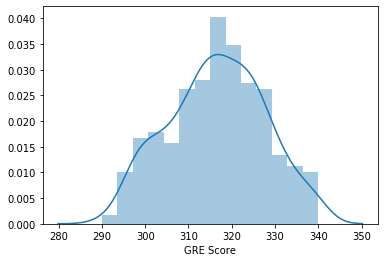

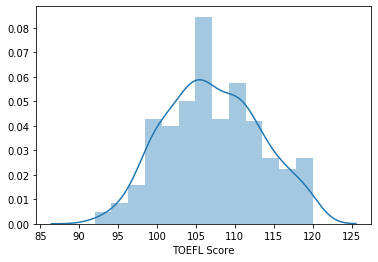

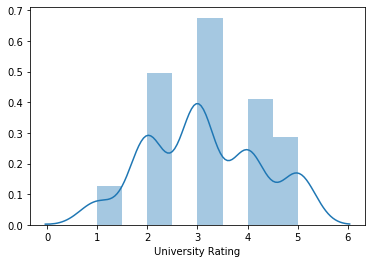

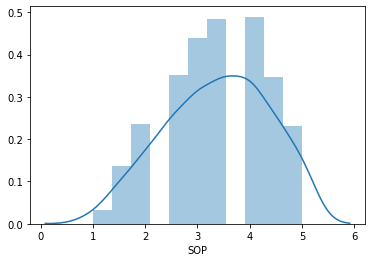

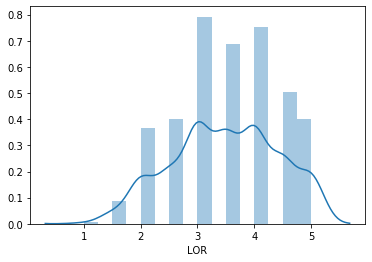

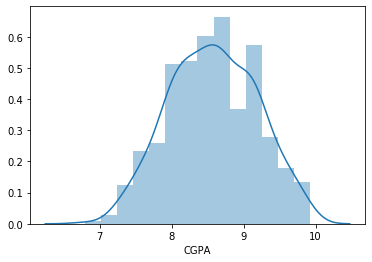

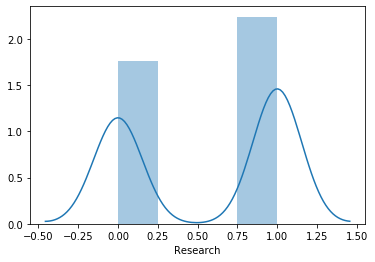

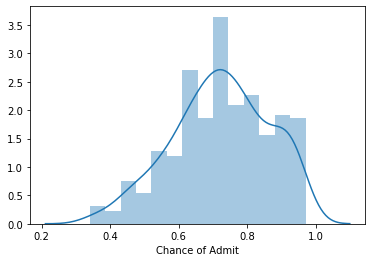

In [9]:
#to check how the data is distributed for every feature in the dataset
for column in data:
    sns.distplot(data[column])
    plt.xlabel(column)
    plt.show()

### We can see that all the features are almost normally distributed

### Now we have to check the relationship between the independent features and dependent features.

In [10]:
y=data["Chance of Admit"]
x=data.drop(columns="Chance of Admit")

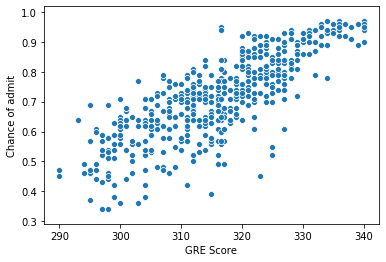

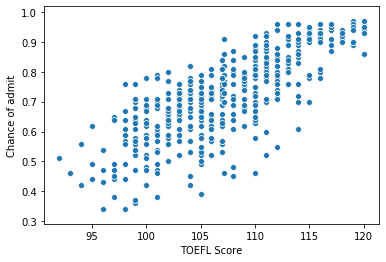

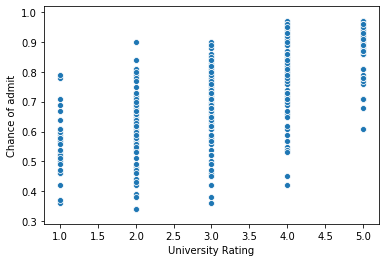

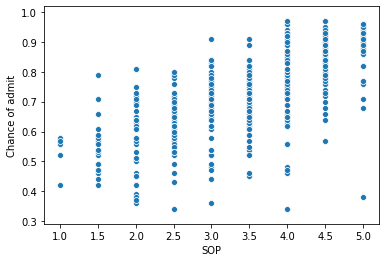

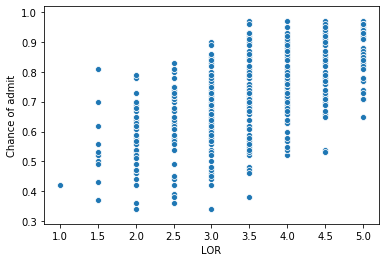

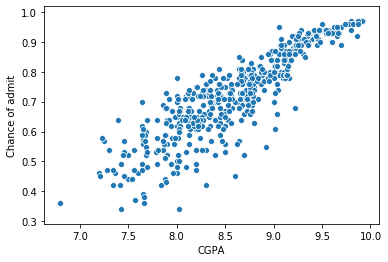

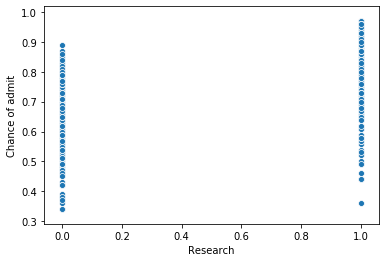

In [11]:
for column in x:
    sns.scatterplot(data[column],y)
    plt.xlabel(column)
    plt.ylabel("Chance of admit")
    plt.show()

The above graphs shows that the relationship between the independent and dependent variable are fairly linear. Thus linearity assumption is satisfied.

Now, lets check for multi-colinearity.

### Standardizing the independent variables is a simple method to reduce multicollinearity that is produced by higher-order terms.

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [13]:
# Now we are going to check the multicolinearity of the independent valriables with the help of VIF. VIF>0 : High collinearity.
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [14]:
vif_data=pd.DataFrame()
vif_data["VIF"]=[vif(x_scaled,i) for i in range(x_scaled.shape[1])]
vif_data["Features"]=x.columns
vif_data

,VIF,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


We don't any VIF greater than 5 , so we are good to go.

Great. Let's go ahead and use linear regression and see how good it fits our data. But first. let's split our data in train and test.

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.25, random_state=42)
y_train

227    0.64
417    0.52
203    0.97
126    0.85
329    0.43
       ... 
106    0.87
270    0.72
348    0.57
435    0.55
102    0.62
Name: Chance of Admit, Length: 375, dtype: float64

In [16]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
import pickle
filename="trained_model.pickle"
pickle.dump(LR,open(filename,"wb"))

In [21]:
filename1="Scaler_model.pickle"
pickle.dump(scaler,open(filename1,"wb"))

In [20]:
pip freeze


alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.12
anaconda-project==0.8.3
argh==0.26.2
asn1crypto==1.3.0
astroid==2.3.3
astropy==4.0
atomicwrites==1.3.0
attrs==19.3.0
autopep8==1.4.4
Babel==2.8.0
backcall==0.1.0
backports.functools-lru-cache==1.6.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
bcrypt==3.1.7
beautifulsoup4==4.8.2
bitarray==1.2.1
bkcharts==0.2
bleach==3.1.0
bokeh==1.4.0
boto==2.49.0
Bottleneck==1.3.2
certifi==2019.11.28
cffi==1.14.0
chardet==3.0.4
Click==7.0
cloudpickle==1.3.0
clyent==1.2.2
colorama==0.4.3
comtypes==1.1.7
conda==4.8.2
conda-build==3.18.11
conda-package-handling==1.6.0
conda-verify==3.4.2
contextlib2==0.6.0.post1
cryptography==2.8
cycler==0.10.0
Cython==0.29.15
cytoolz==0.10.1
dask==2.11.0
decorator==4.4.1
defusedxml==0.6.0
diff-match-patch==20181111
distributed==2.11.0
docutils==0.16
entrypoints==0.3
et-xmlfile==1.0.1
fastcache==1.1.0
filelock==3.0.12
flake8==3.7.9
Flask==1.1.1
fsspec==0.

In [23]:
#prediction using the same model
loaded_model=pickle.load(open(filename,"rb"))
a=loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a

array([0.91301167])

In [24]:
LR.score(x_train,y_train)

0.8205681087702014

In [28]:
#Function to calculate adjusted R2
def adjusted_r2(x,y):
    r2=LR.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adj_R2= 1-((1-r2)*(n-1)/(n-p-1))
    return adj_R2

In [29]:
adjusted_r2(x_train,y_train)

0.8171457021254913

We can see that R2 is 82% and adjusted R2 is also 82% which means that there was np penalty on the features.
Let's check for the test data

In [30]:
LR.score(x_test,y_test)

0.8175156689543608

In [31]:
adjusted_r2(x_test,y_test)

0.8065978029943652

R2 and adjusted R2 score is slightly less for the test data. Hence let's check if our model is overfitting our training data

In [33]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [34]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

3.9434667449983495e-05

In [35]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=3.9434667449983495e-05, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
lasso_reg.score(x_test, y_test)

0.8175389767629719

our r2_score for test data (81.75%) comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data.

In [37]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([4.217902  , 3.82105922, 3.92747328, 0.56609599, 2.28688155,
       8.9058002 , 9.47035692, 2.08936918, 4.78851783, 2.91624648,
       3.62446912, 8.28924124, 5.84607689, 7.97738042, 4.72125553,
       5.40697921, 3.93852023, 4.66735858, 4.93353513, 0.7196621 ,
       6.81394233, 1.87239869, 0.20067171, 1.16652728, 9.5931533 ,
       2.66619318, 4.79750718, 1.89329812, 6.78438819, 0.8492727 ,
       2.31754665, 4.80921728, 5.2176867 , 8.37004998, 6.45589944,
       0.13059632, 1.64597971, 0.58946008, 3.40183467, 4.78509885,
       4.04110374, 8.60443561, 5.49048008, 3.71272562, 0.7995634 ,
       9.95052862, 4.98167589, 6.71923185, 9.56523877, 1.38283765]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [38]:
ridgecv.alpha_

0.13059632144330147

In [39]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.13059632144330147, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [40]:
ridge_model.score(x_test, y_test)

0.8175288266656158

we got the same r2 score using Ridge regression as well. So, it's safe to say there is no overfitting.

In [41]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [42]:
elasticCV.alpha_

0.0015192830420866687

In [43]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [44]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.0015192830420866687, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [45]:
elasticnet_reg.score(x_test, y_test)

0.8179437609247238

So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.